In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. Agregar la raiz del proyecto al sistema para poder  importar 'src'
sys.path.append(os.path.abspath(os.path.join('..')))

#2. Importar funciones
from src.util import cargar_archivo


In [2]:

#3. Ejecutar el pipeline de exploración y limpieza
df_raw =cargar_archivo('raw_df_cancer','data','raw',formato='csv')

✅ Archivo cargado desde: C:\Users\JM\Proyecto_red_neuronal_cancer\data\raw\raw_df_cancer.csv


In [3]:
df_raw

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Existen dos columnas que debemos eliminar del analisis "id","Unnamed: 32" -->Se define en la logica de limpieza la variable necesaria para limpiar esas dos columnas

In [4]:
#Eliminamos columnas ya mapeadas y logica encapsulada

from src.limpieza import eliminar_columnas
cols_drop = ['id','Unnamed: 32']

df_raw = eliminar_columnas(df_raw, cols_drop)

    

In [5]:
#Traducir a español las columnas para mejorar la interpretabilidad

from src.limpieza import renombrar_columnas
df_raw = renombrar_columnas(df_raw)

In [6]:
#Ahora veamos un analisis descripitvo de las variables numericas

df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
radio_promedio,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
textura_promedio,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimetro_promedio,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_promedio,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
suavidad_promedio,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactacion_promedio,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavidad_promedio,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
puntos_de_concavidad_promedio,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
simetria_promedio,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
dimension_fractal_promedio,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
from src.feature import codificar_diagnostico

df_raw = codificar_diagnostico(df_raw)
#Vericar el cambio
df_raw['diagnostico'].value_counts()

Variable 'diagnostico' codificada correctamente


diagnostico
0    357
1    212
Name: count, dtype: int64

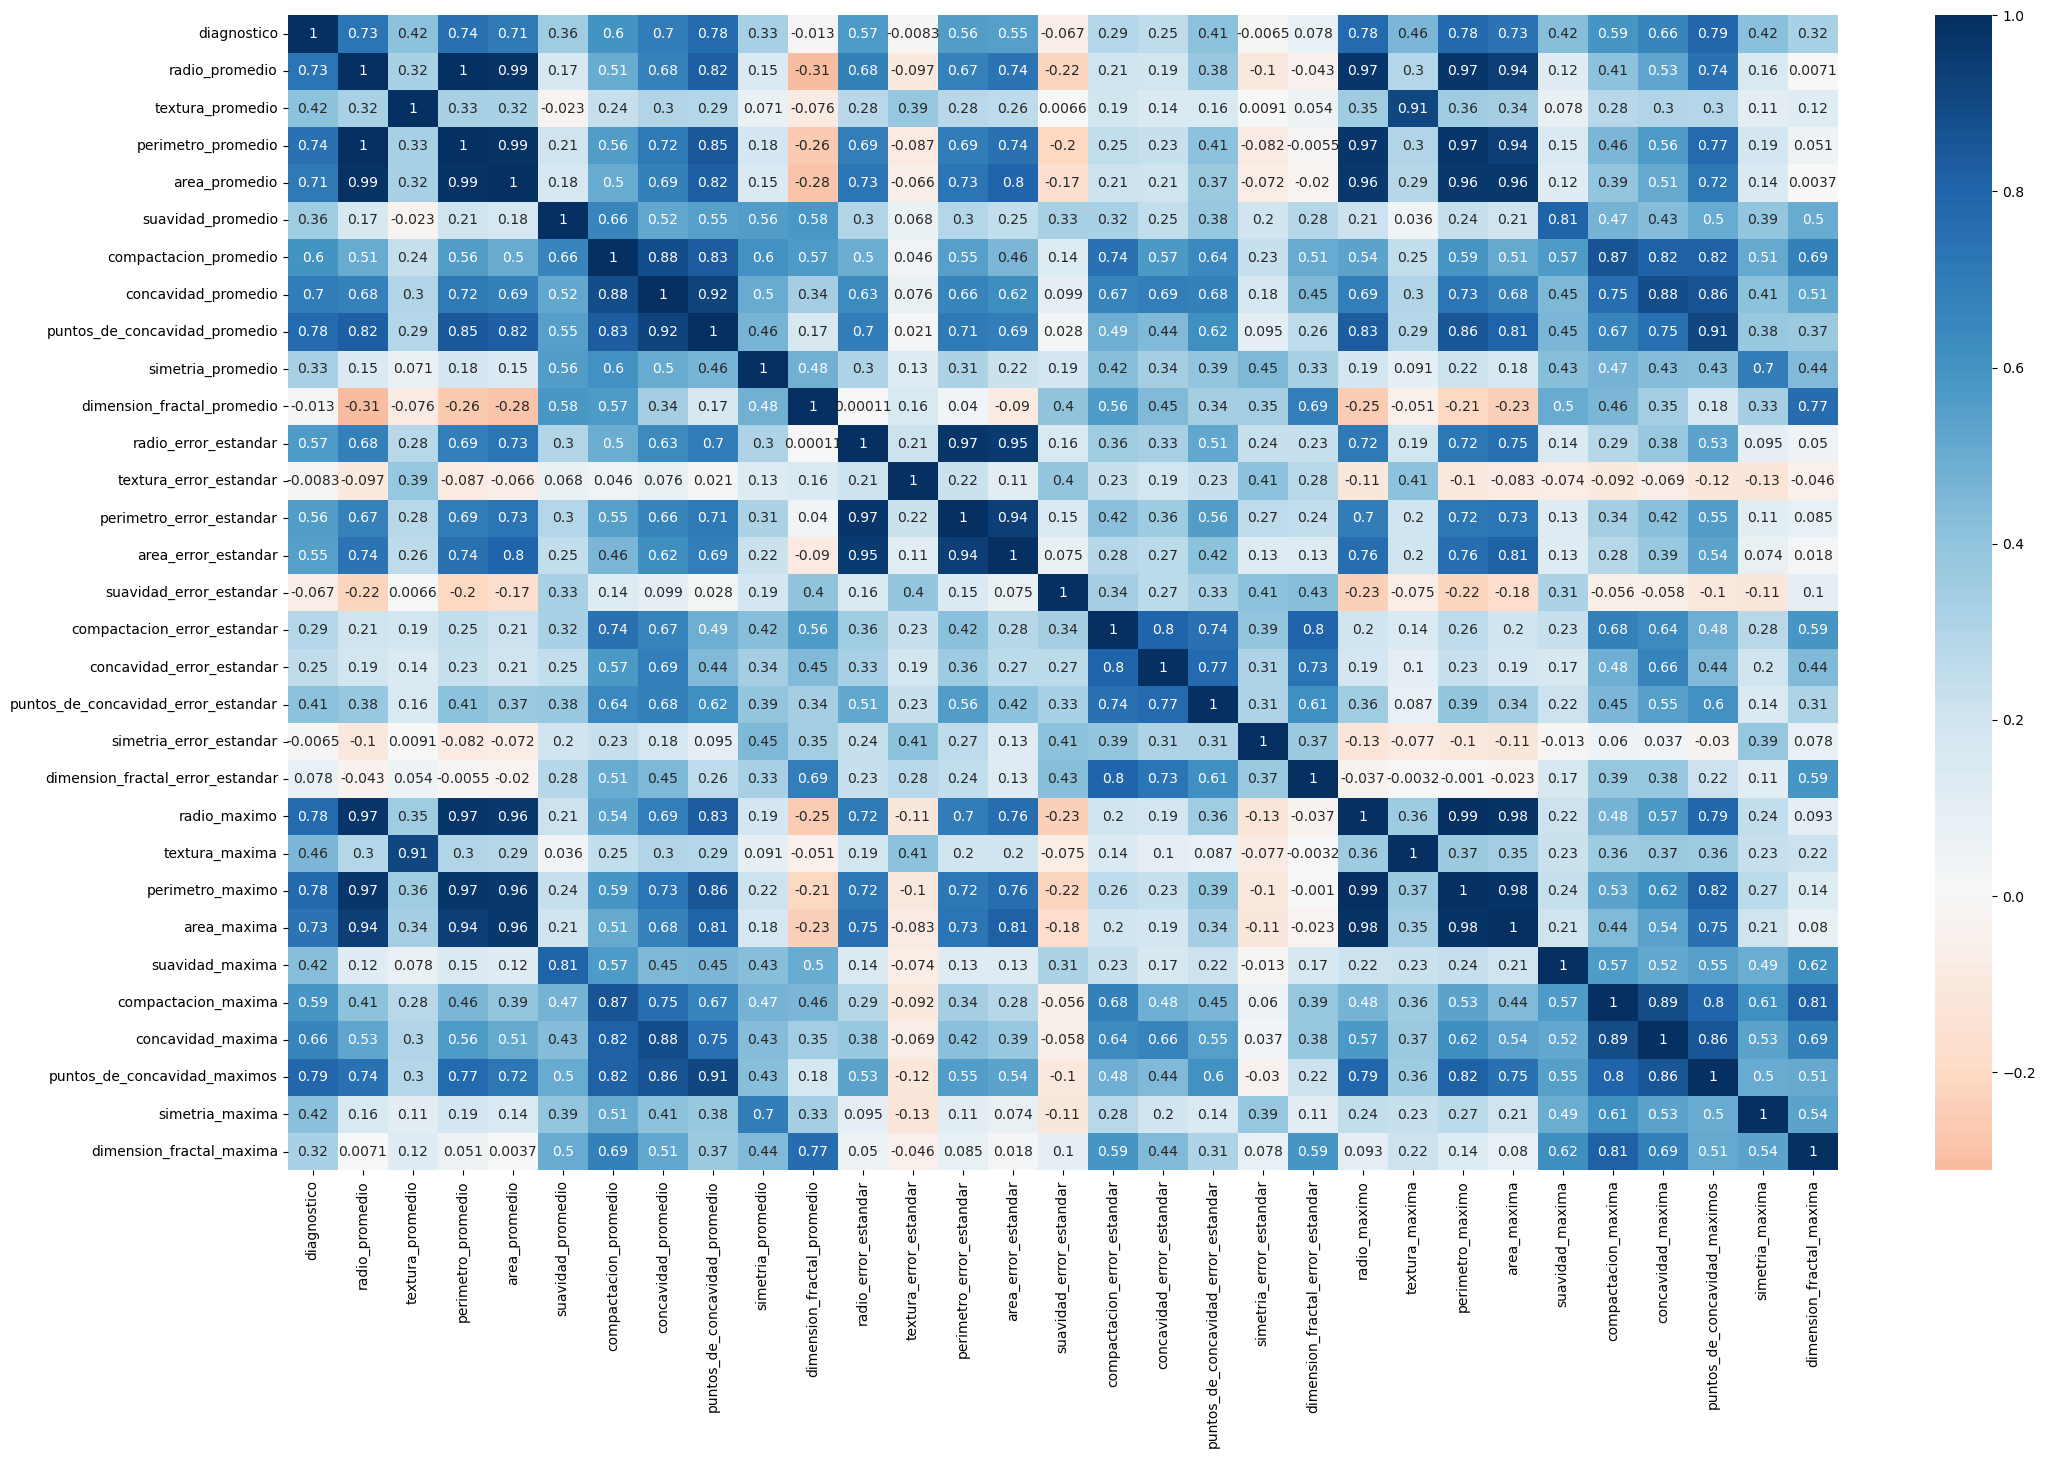

In [8]:
plt.figure(figsize=(25,15))
# Solo correlacionamos columnas numéricas (excluimos id si aún existe)
sns.heatmap(df_raw.select_dtypes(include=['number']).corr(), 
            cmap='RdBu',
            center=0,
            annot=True)
plt.show()

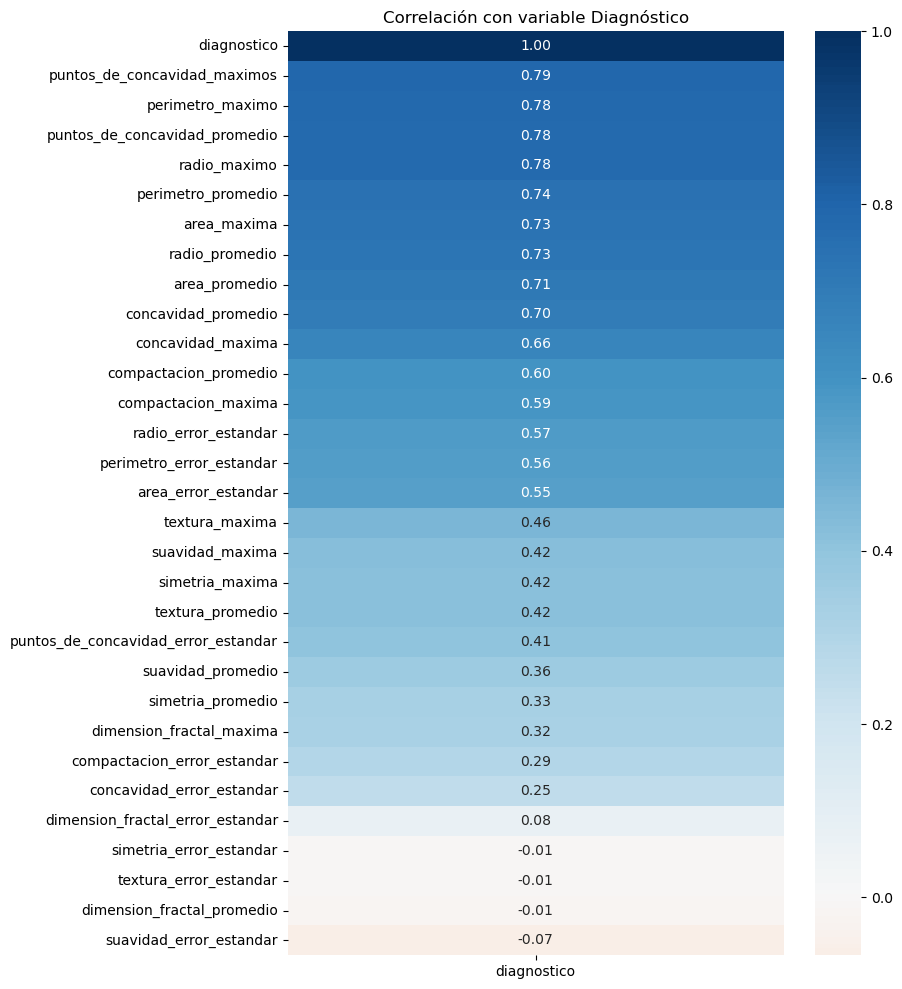

In [9]:
#Calcular Matriz de correlación
corr = df_raw.corr()

corr_objetivo = corr[['diagnostico']].sort_values(by='diagnostico', ascending=False)

# Gráfico
plt.figure(figsize=(8, 12))
sns.heatmap(corr_objetivo, 
            annot=True,          # Mostrar valores
            cmap='RdBu',
            center=0,
            fmt=".2f")           # 2 decimales

plt.title('Correlación con variable Diagnóstico')
plt.show()

# 📊 Resumen Práctico de la Matriz de Correlación (Enfoque: Red Neuronal)

| Hallazgo                            | Variables involucradas                                          | Qué significa                           | Impacto en Red Neuronal                       | Acción recomendada         |
| ----------------------------------- | --------------------------------------------------------------- | --------------------------------------- | --------------------------------------------- | -------------------------- |
| 🔴 Alta correlación con diagnóstico | radio, perímetro, área, concavidad, concave points (mean y max) | Son las variables más predictivas       | La red aprenderá patrones fuertes rápidamente | Mantenerlas                |
| 🟠 Correlación moderada             | textura, compactación, simetría                                 | Aportan señal complementaria            | Ayudan a mejorar generalización               | Mantenerlas                |
| 🟡 Baja correlación                 | dimensión fractal y algunas medidas de error estándar           | Poco poder lineal individual            | Pueden aportar relaciones no lineales         | No eliminar sin probar     |
| 🔵 Multicolinealidad alta (>0.9)    | radio–perímetro–área (mean y max)                               | Variables matemáticamente dependientes  | No afecta gravemente a redes neuronales       | No es obligatorio eliminar |
| 🟣 Bloque de errores estándar       | *_error_estandar                                                | Grupo altamente correlacionado entre sí | Puede introducir ruido si no se regulariza    | Evaluar con regularización |






# 🧠 Implicaciones Específicas para un modelo de  Red Neuronal
| Aspecto           | Recomendación                                  |
| ----------------- | ---------------------------------------------- |
| Escalamiento      | Obligatorio usar StandardScaler o MinMaxScaler |
| Multicolinealidad | No es crítico como en regresión logística      |
| Overfitting       | Usar Dropout o L2 regularization               |
| Feature Selection | Opcional, pero no estrictamente necesaria      |
| PCA               | Solo si quieres reducir dimensionalidad        |


 La Variable con Mayor correlación (0,76)

In [10]:
from src.vizualizaciones import plot_boxplots, plot_histograms

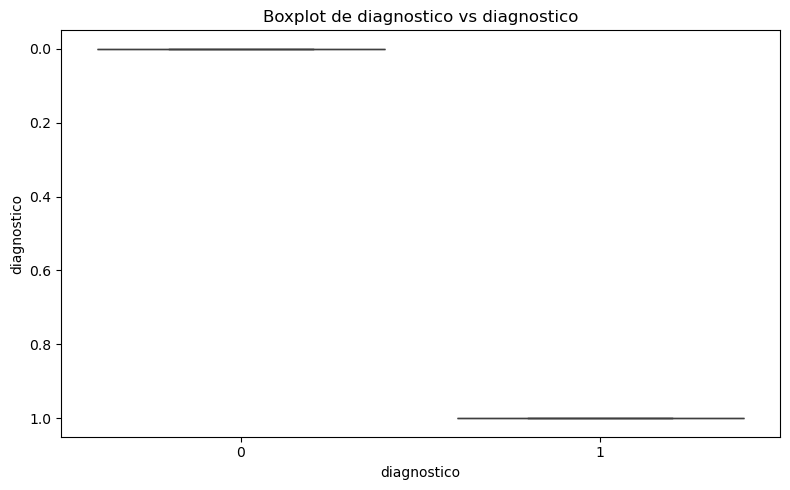

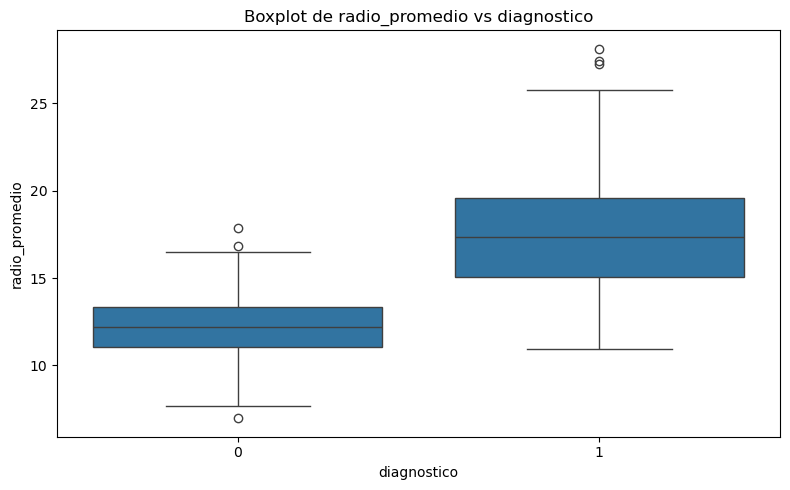

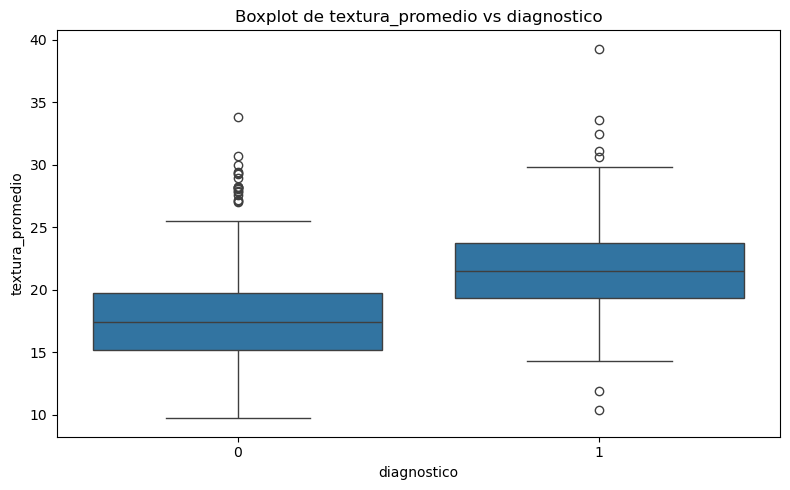

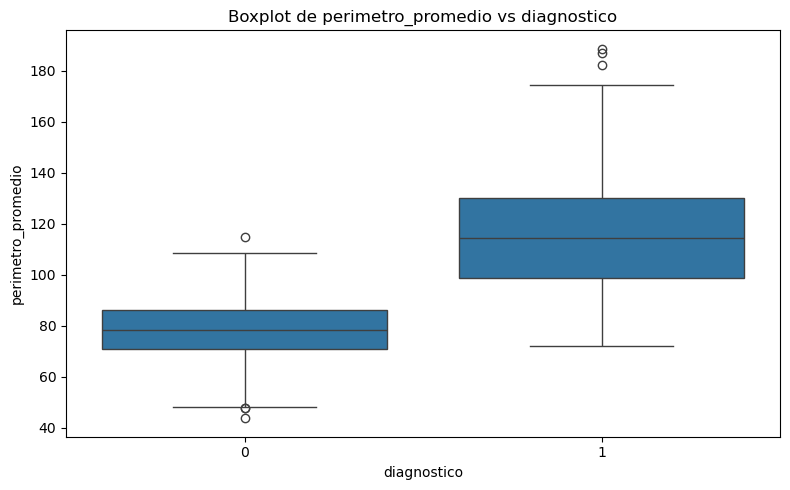

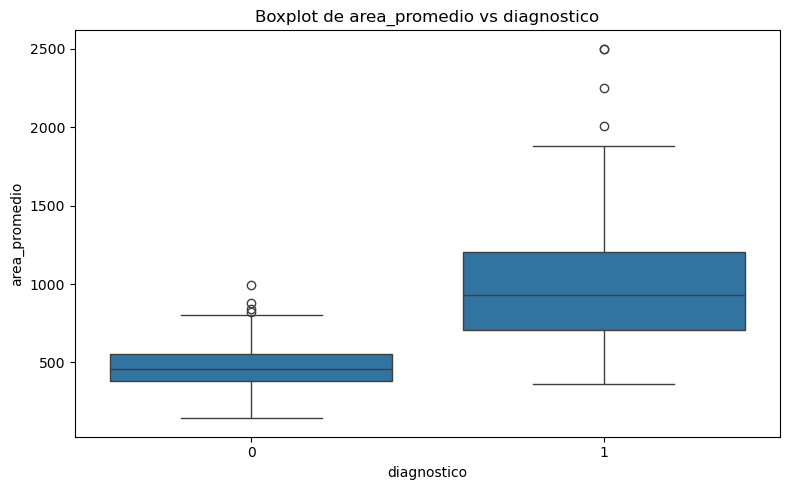

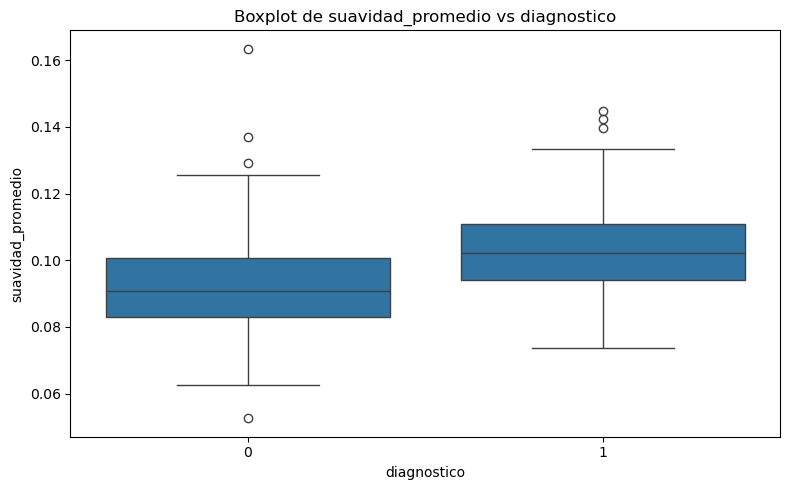

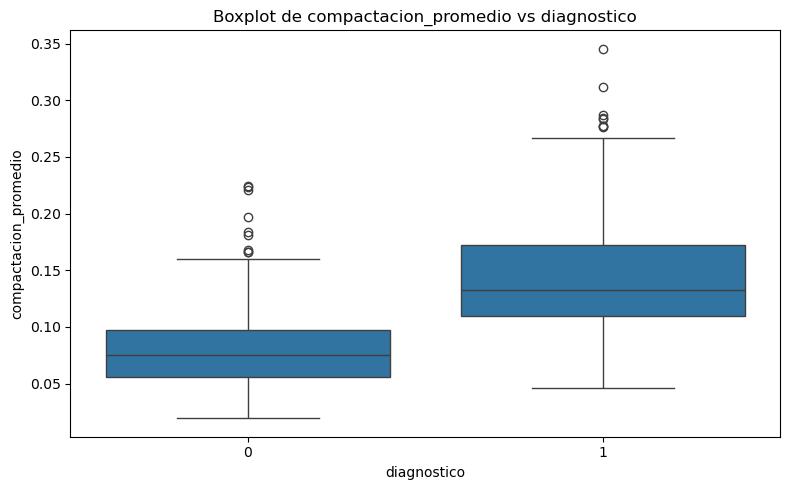

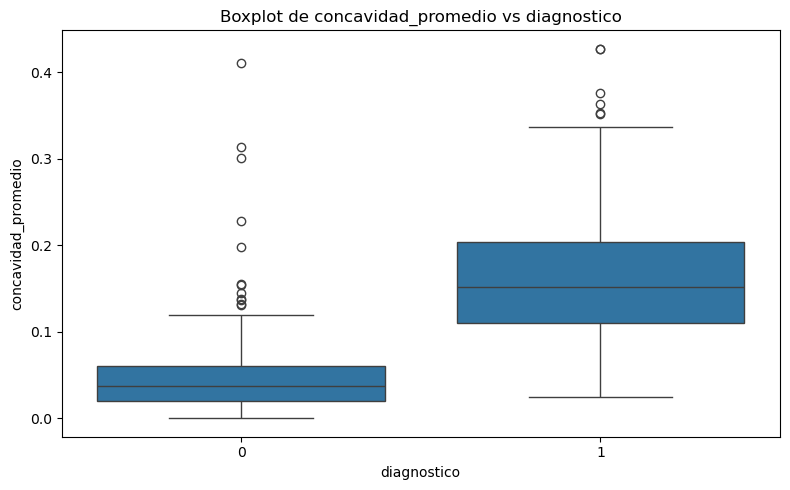

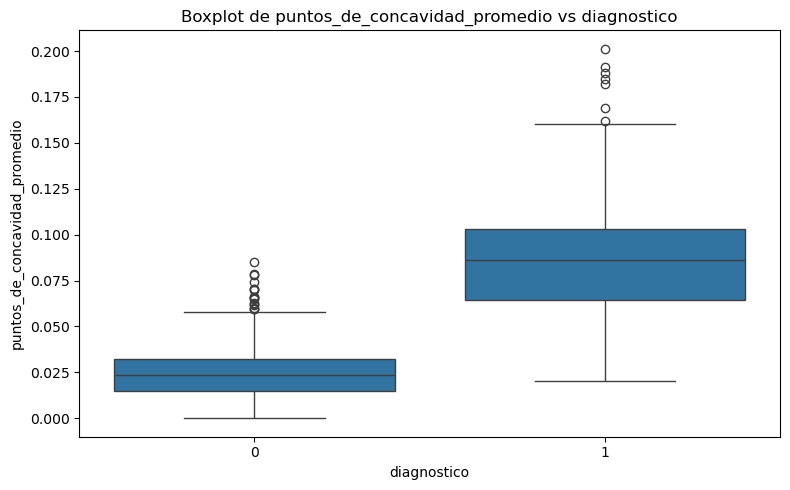

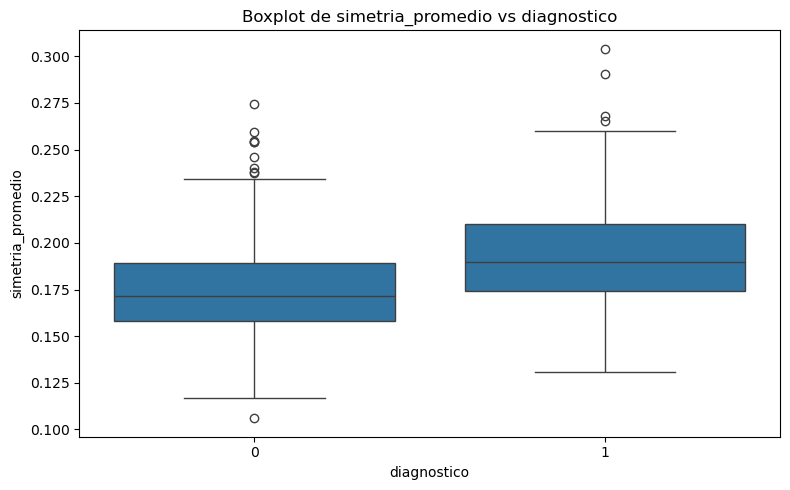

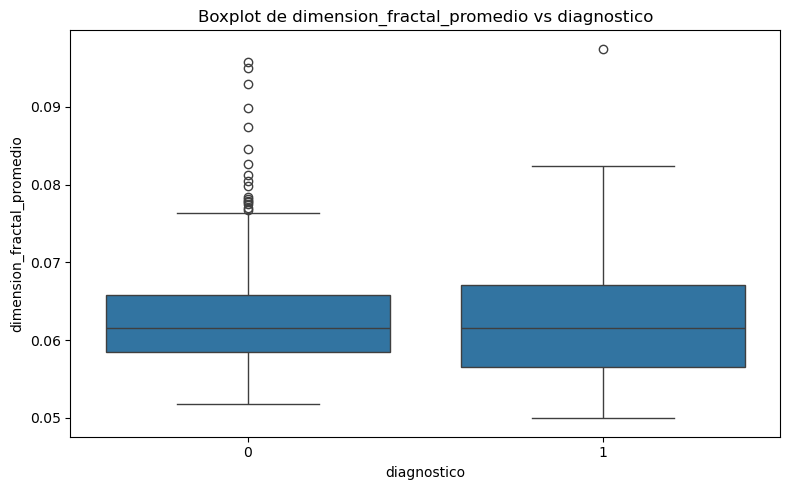

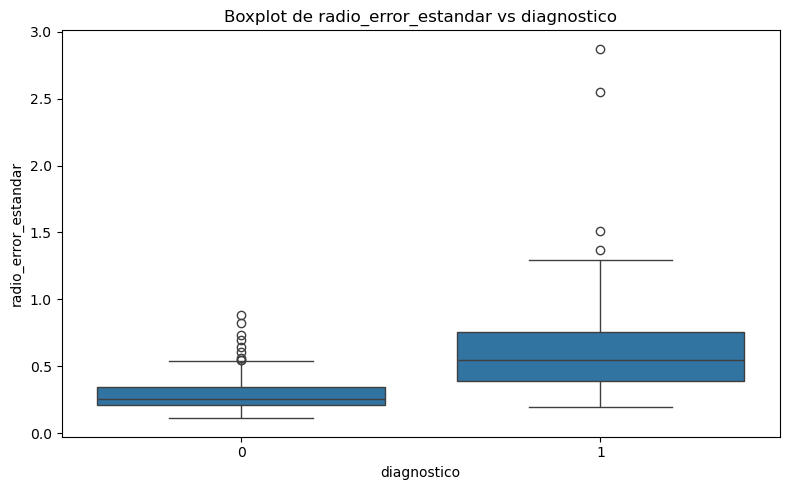

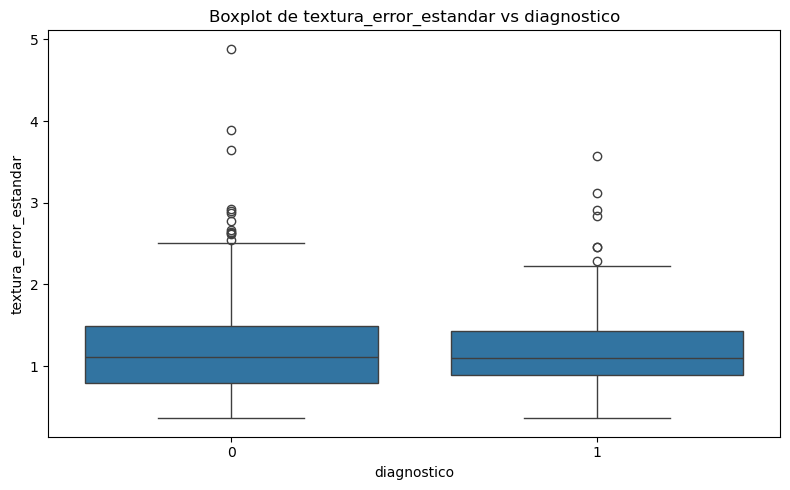

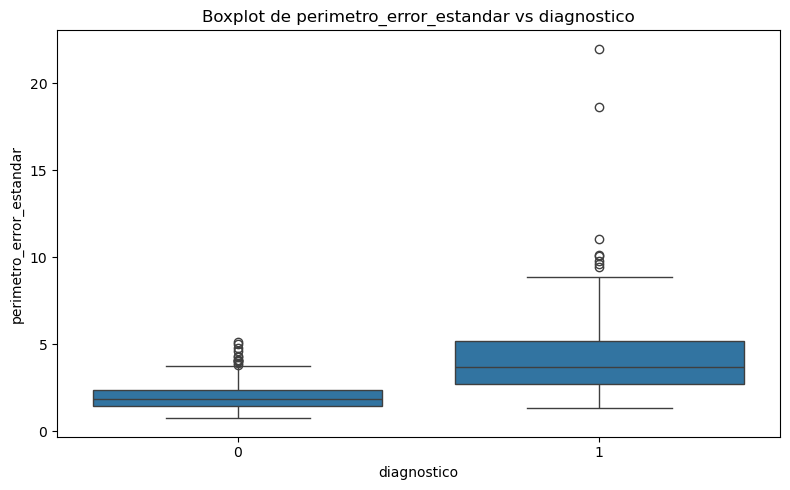

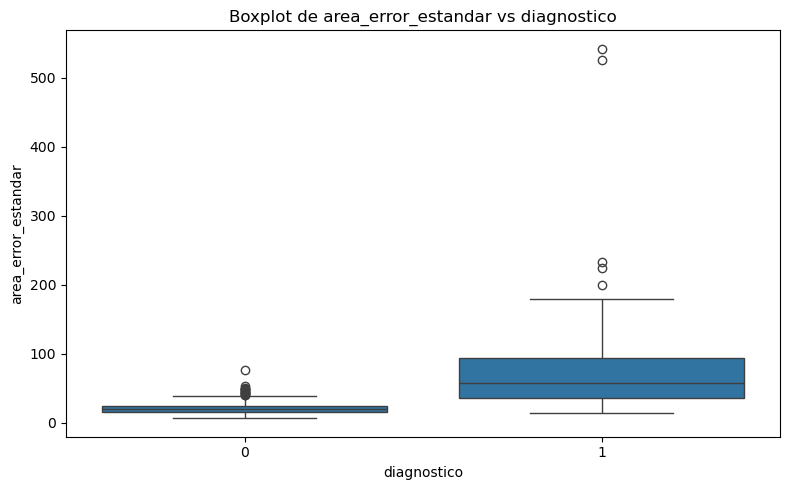

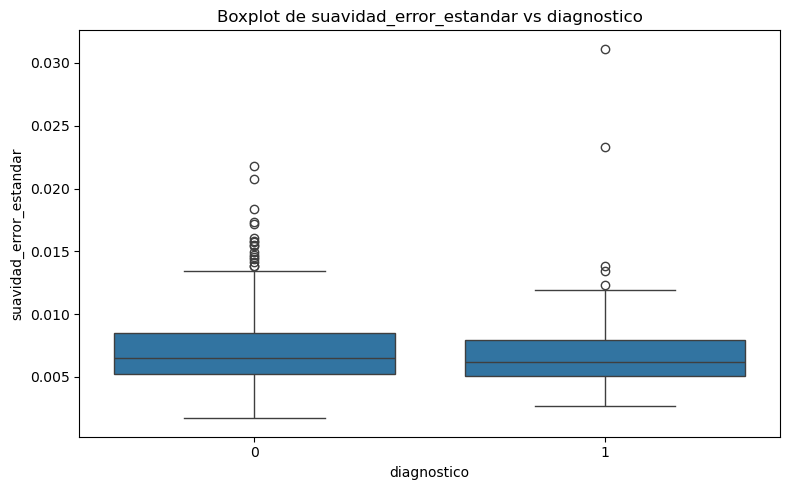

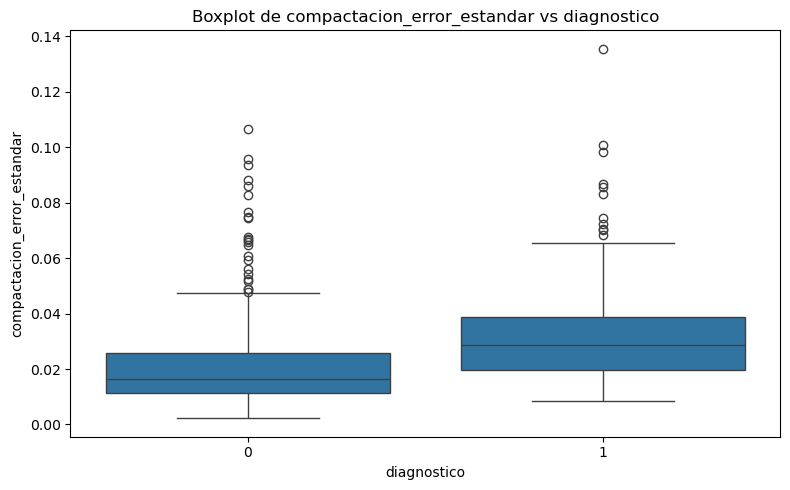

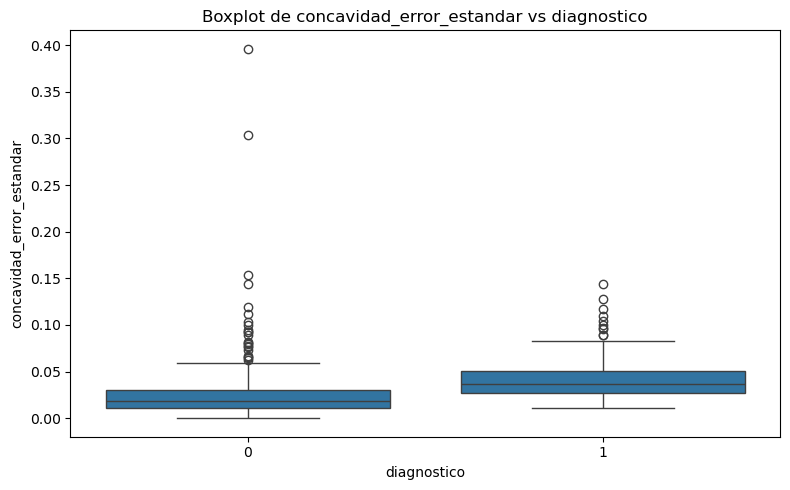

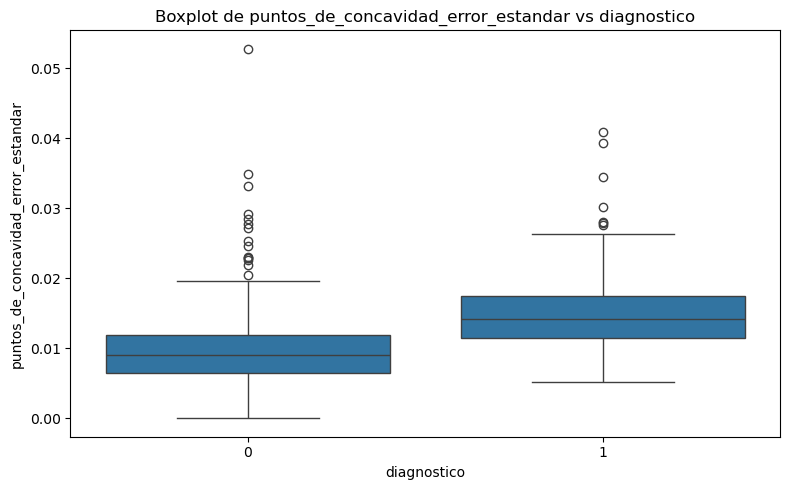

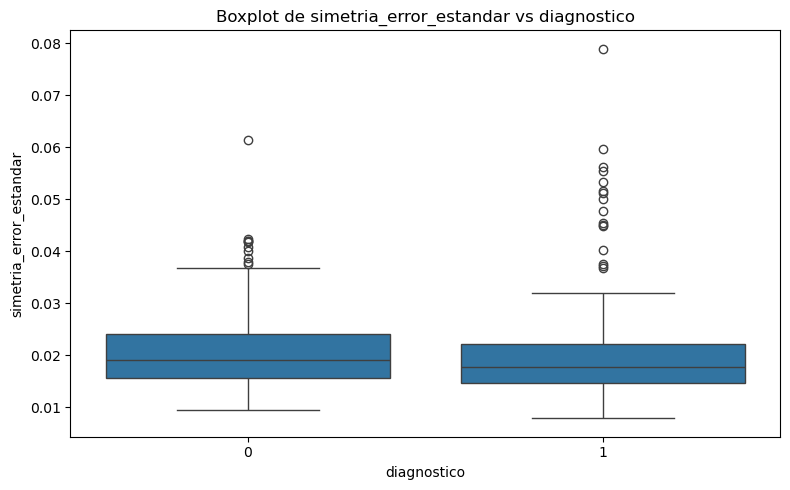

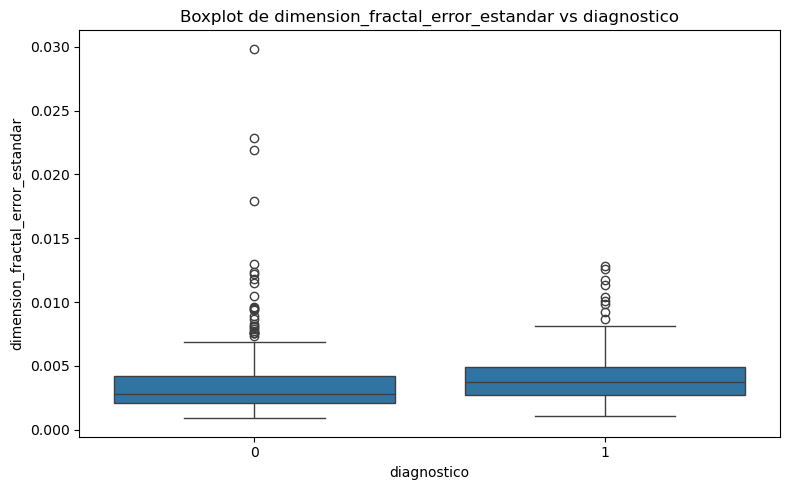

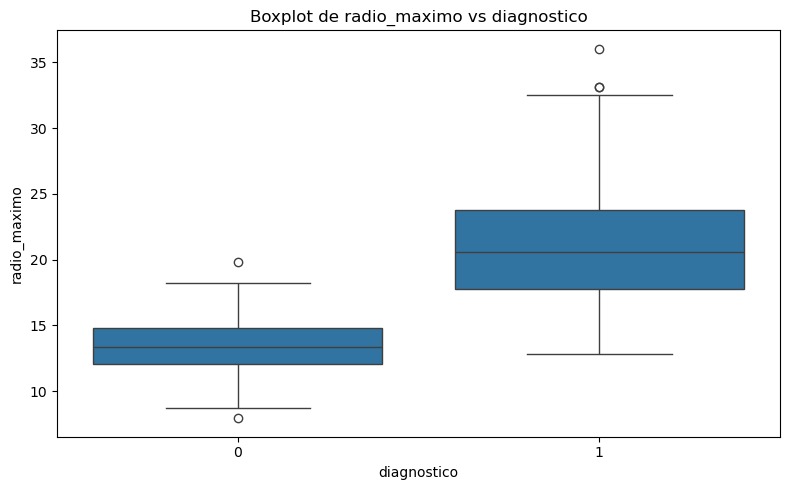

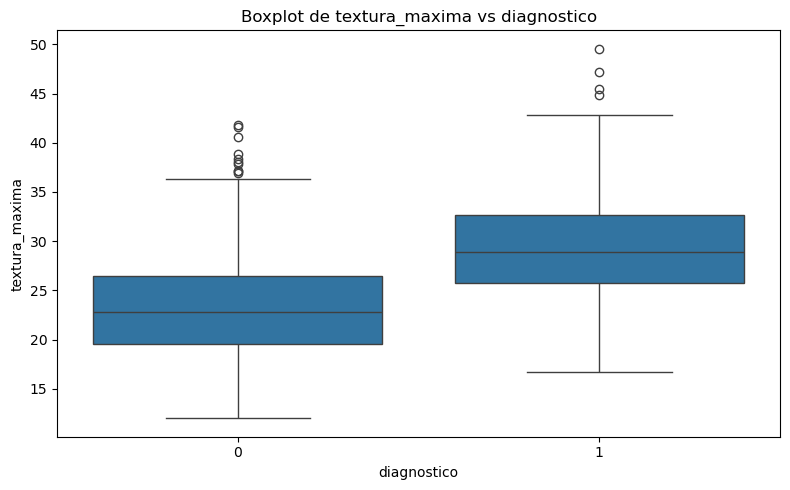

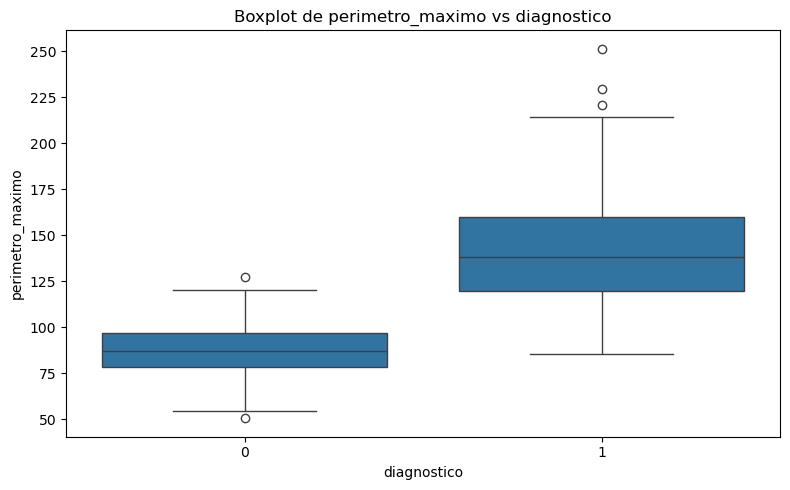

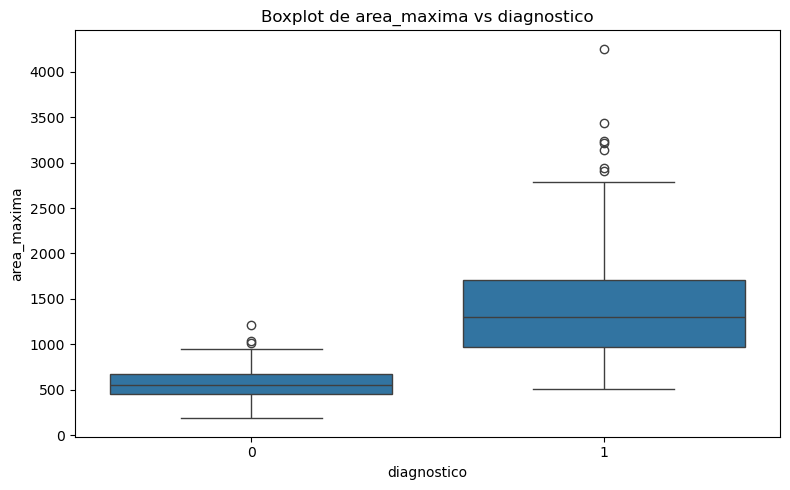

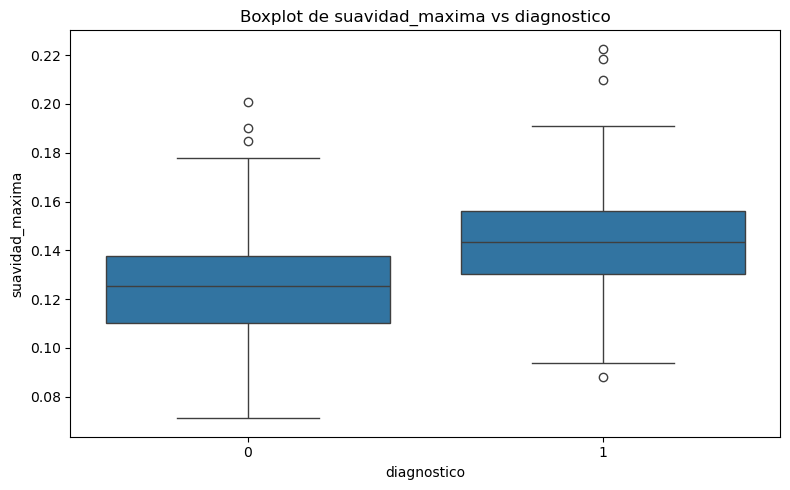

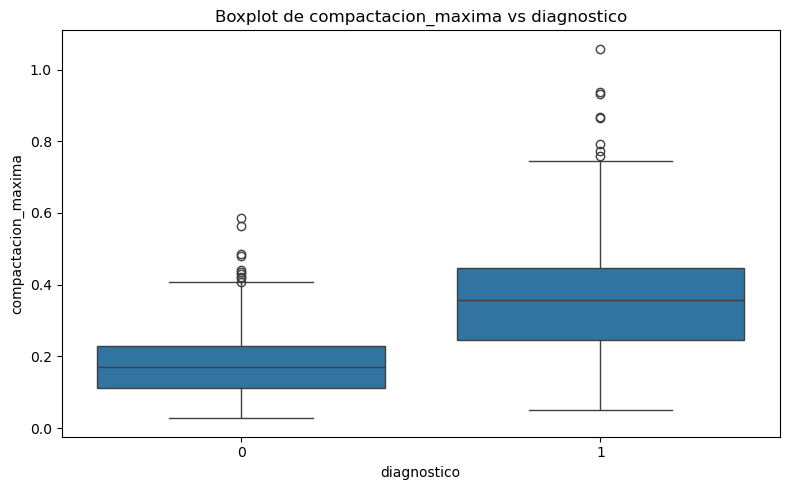

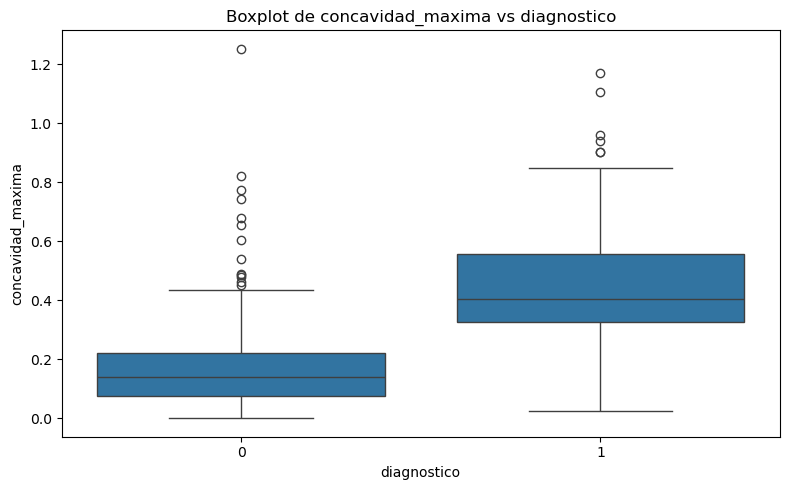

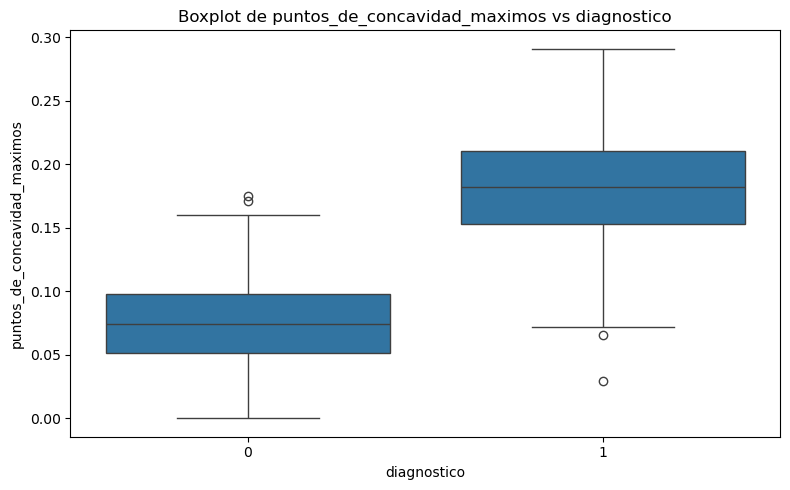

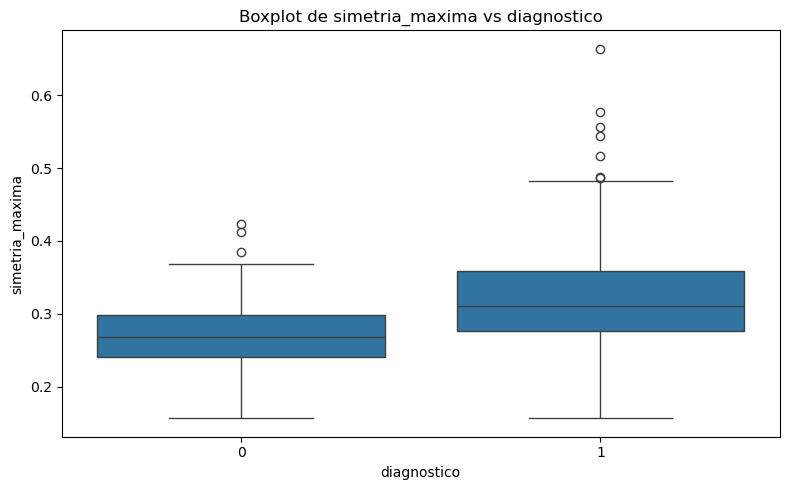

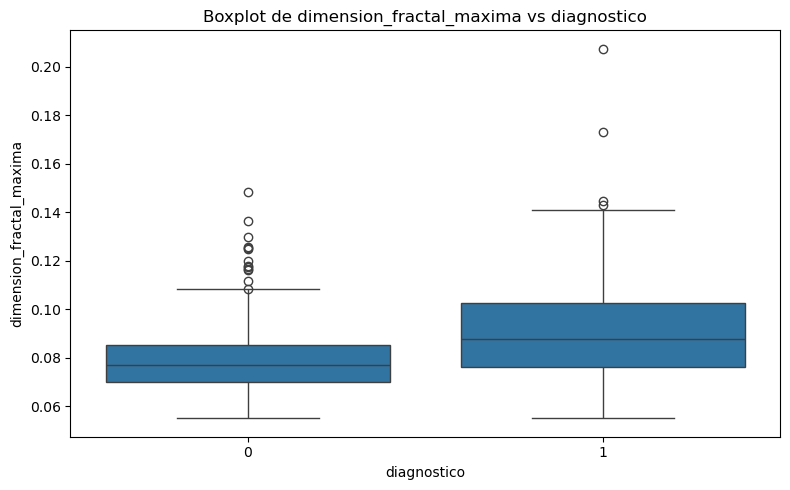

In [11]:
#Unicamente aquí convertimos la variablle objetivo en coategorica para garantizar la separación
df_raw["diagnostico"] = df_raw["diagnostico"].astype("category")

var_top = df_raw.columns

plot_boxplots(df_raw, var_top,target = 'diagnostico')

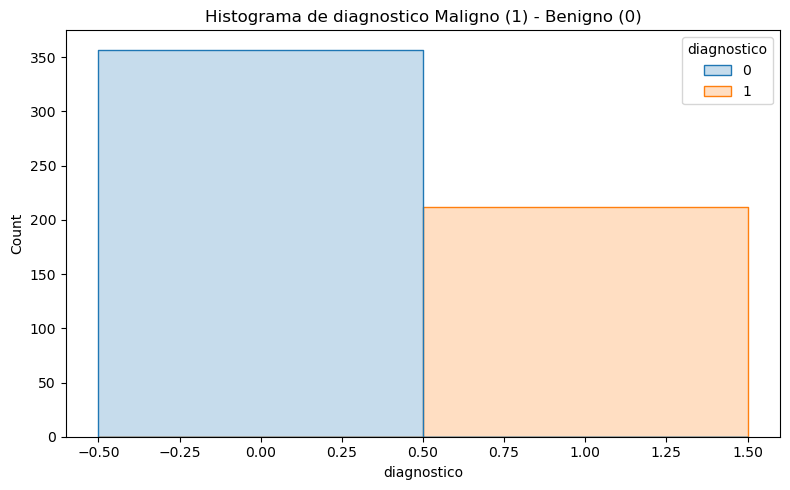

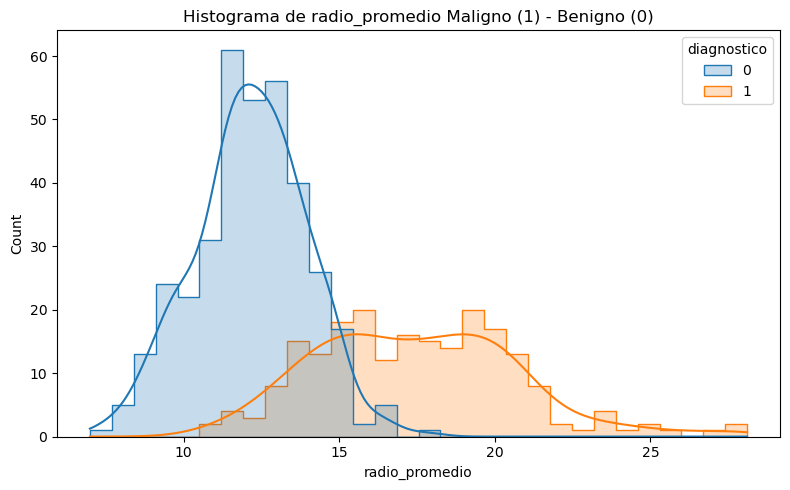

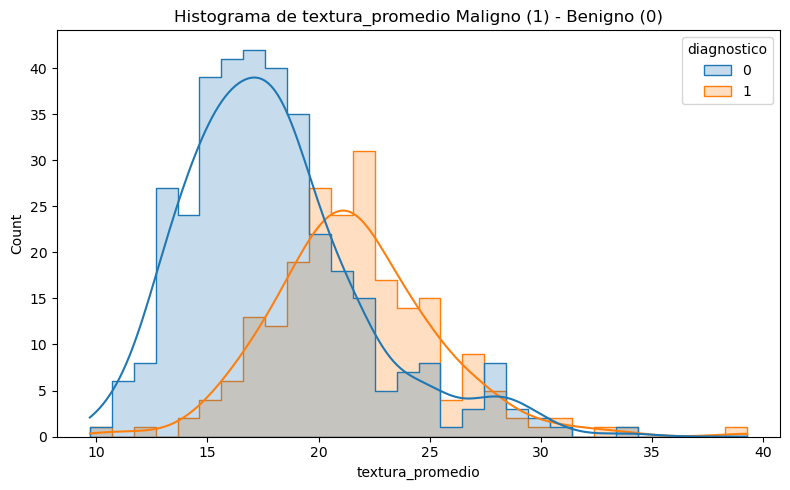

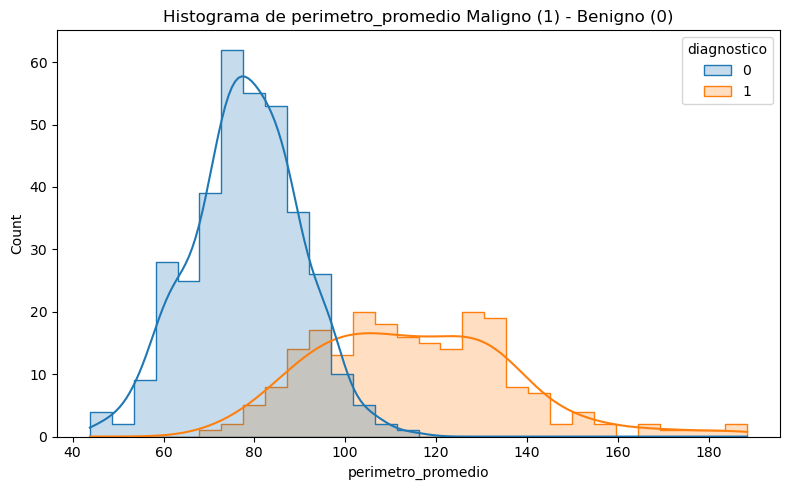

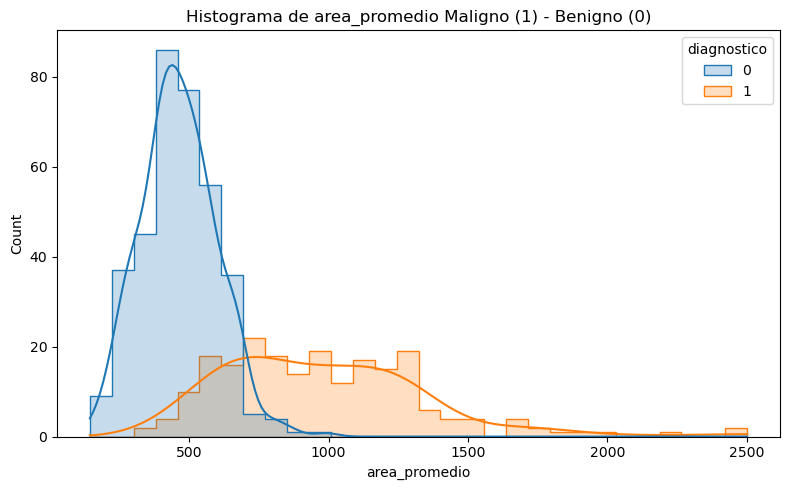

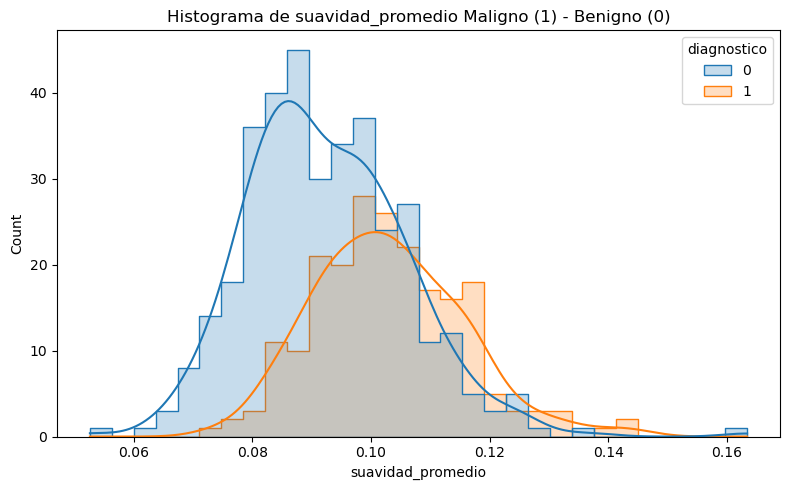

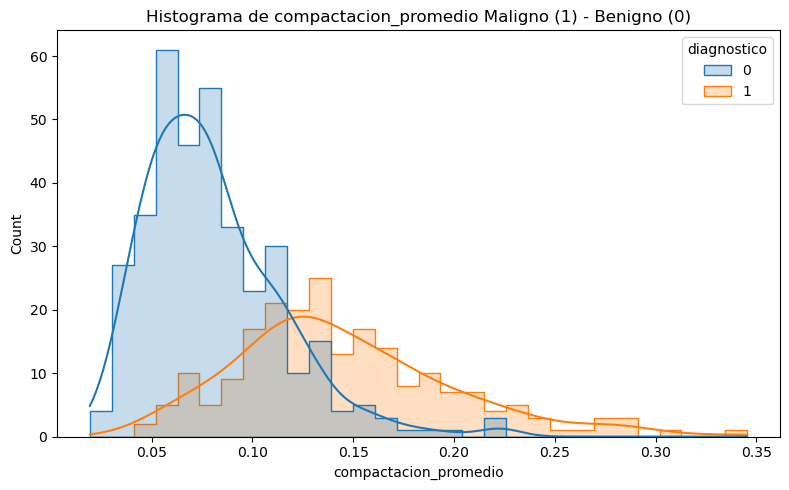

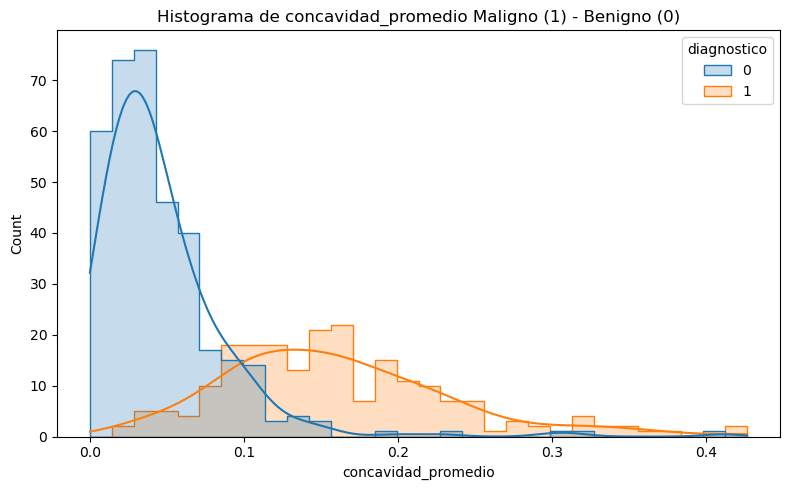

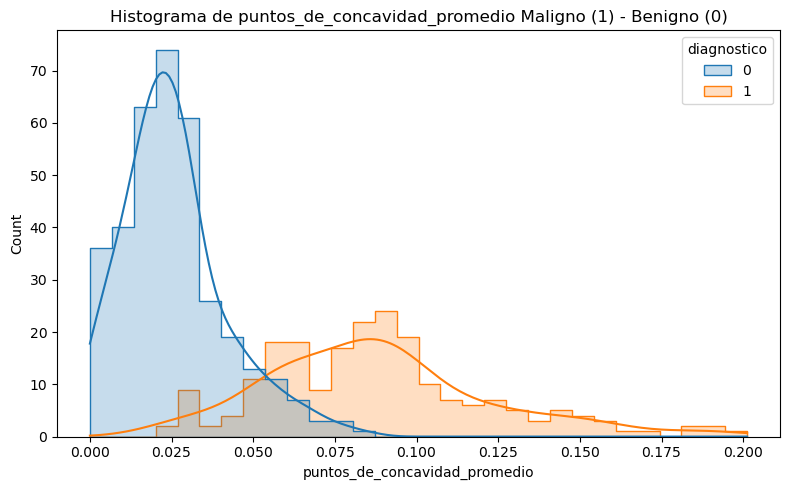

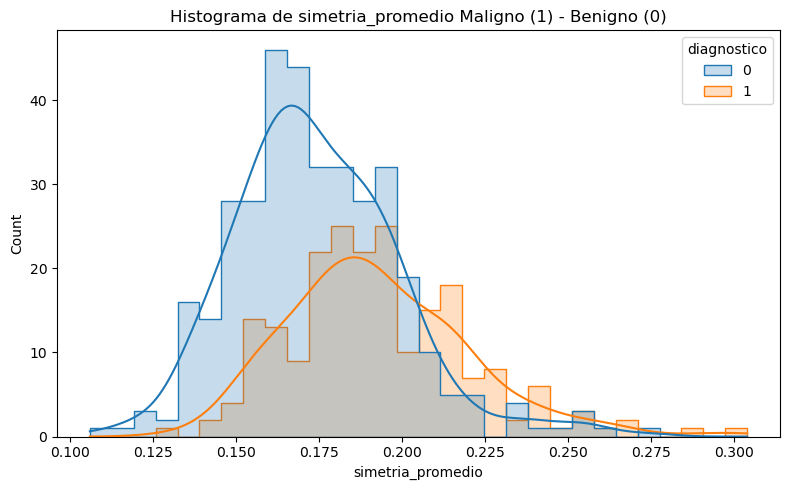

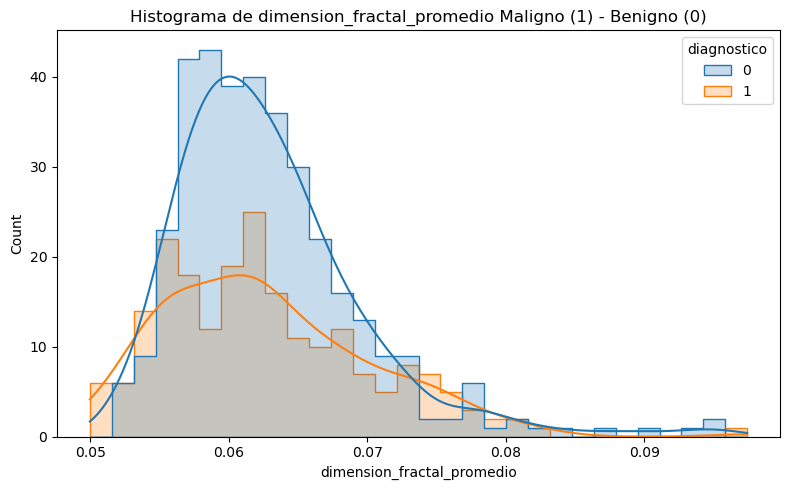

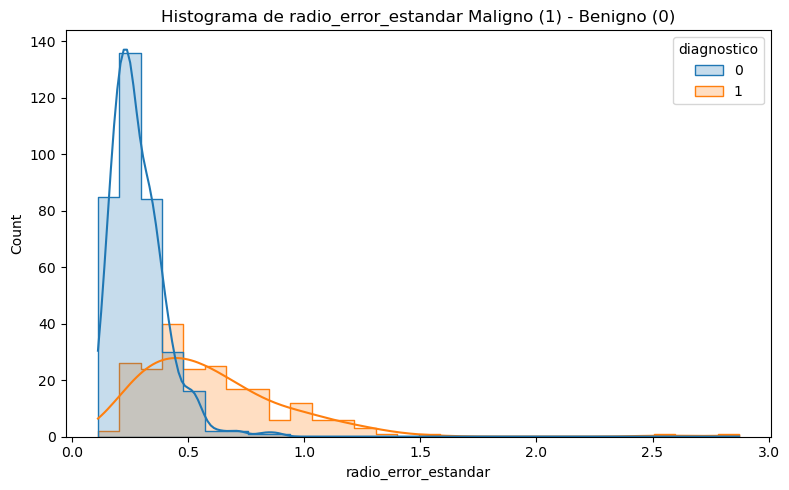

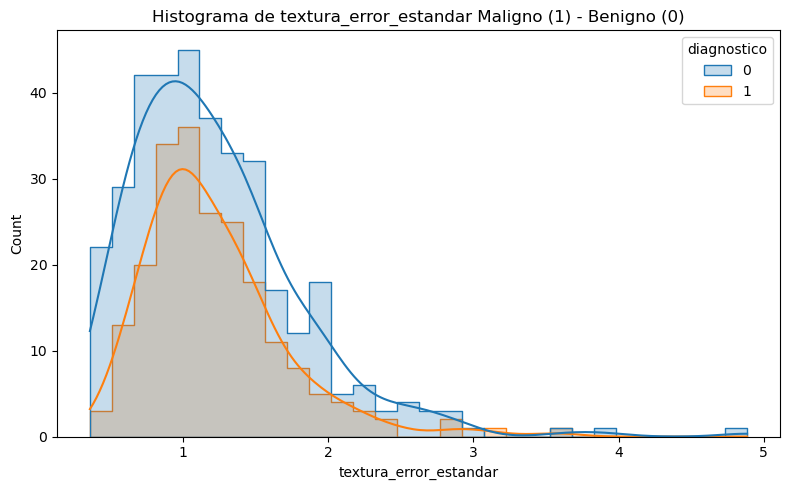

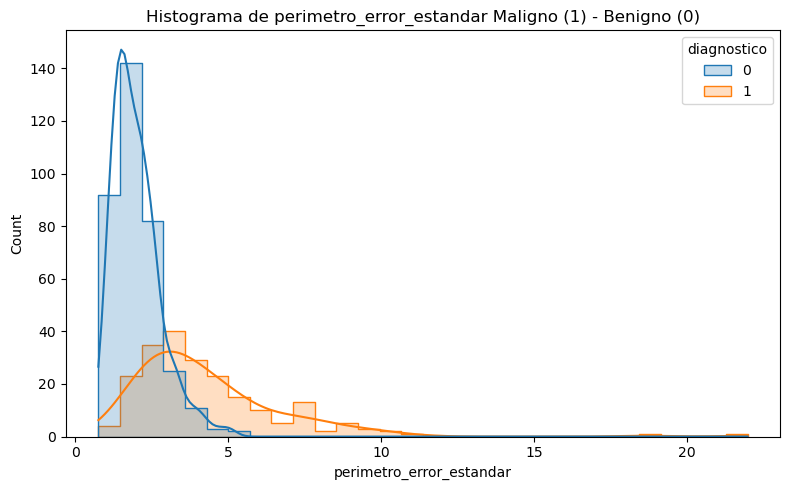

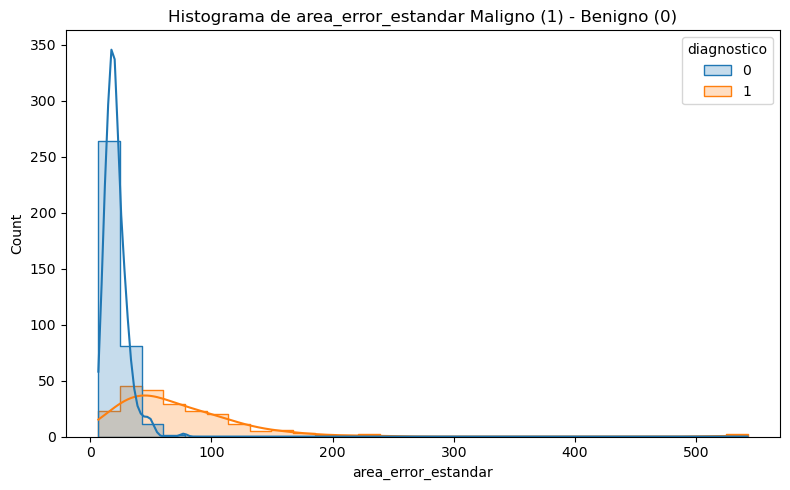

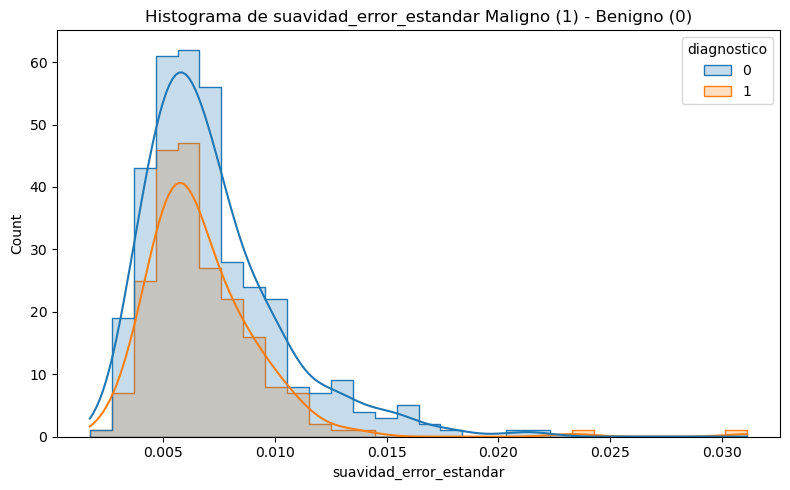

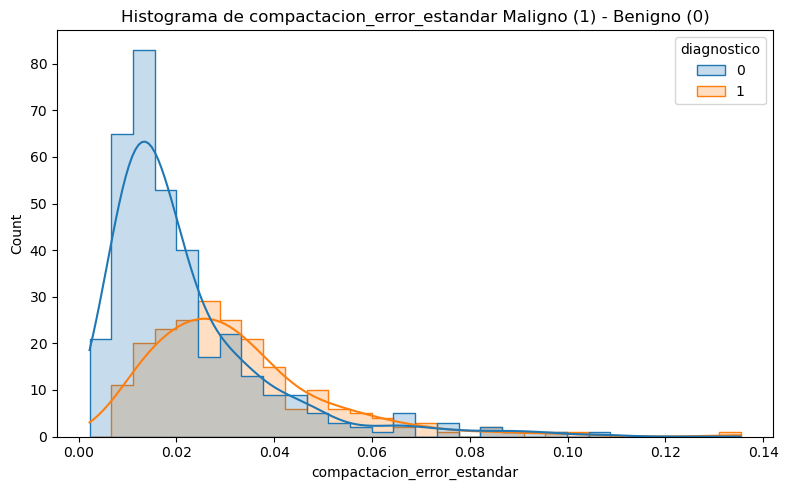

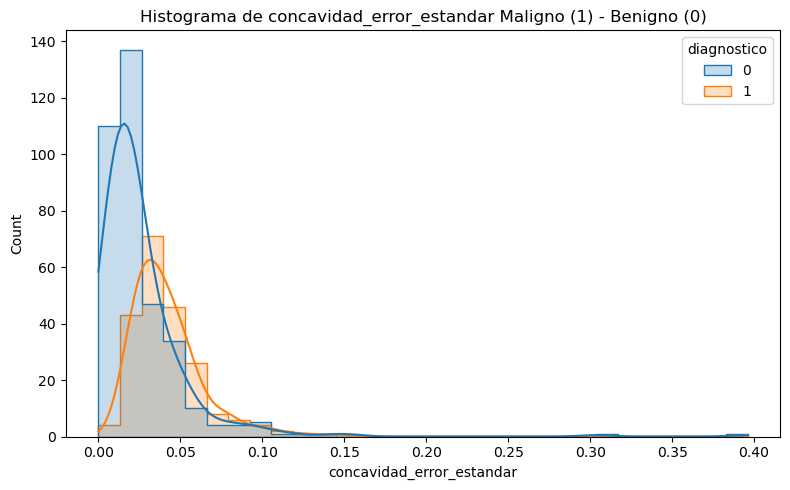

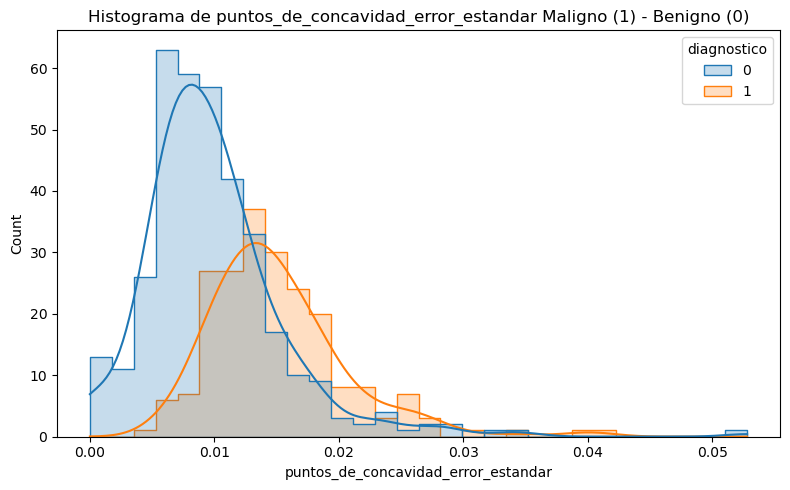

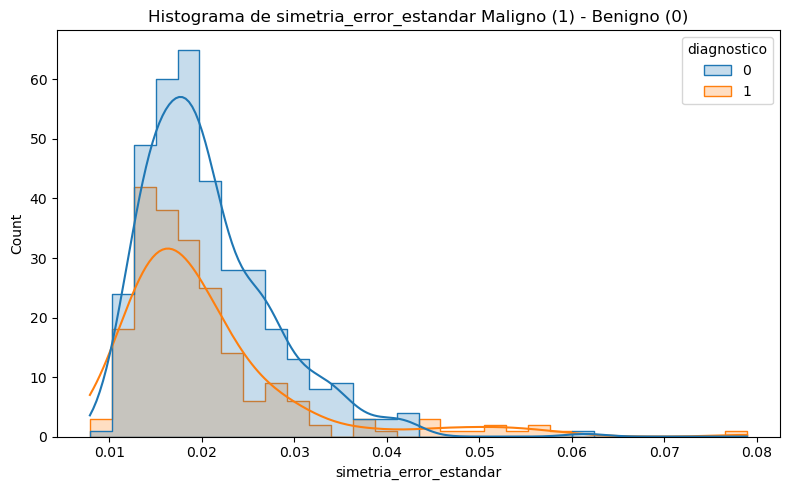

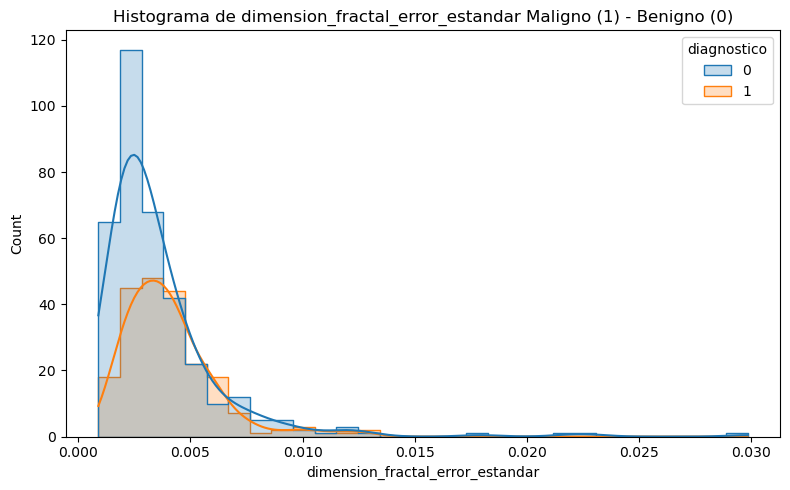

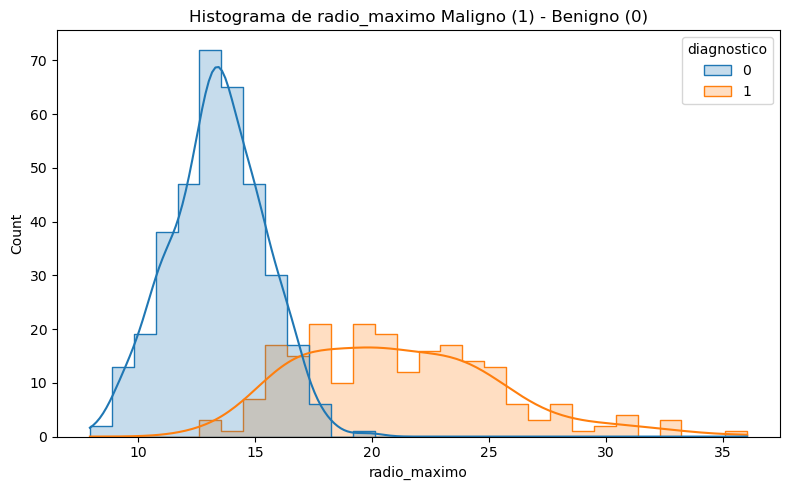

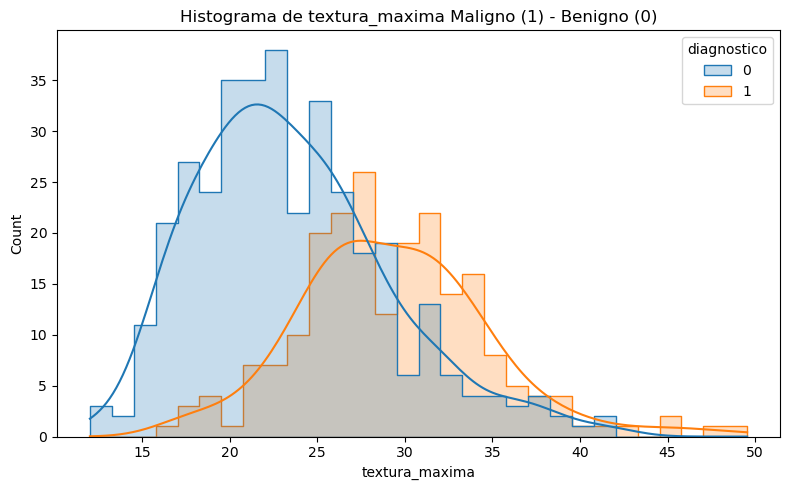

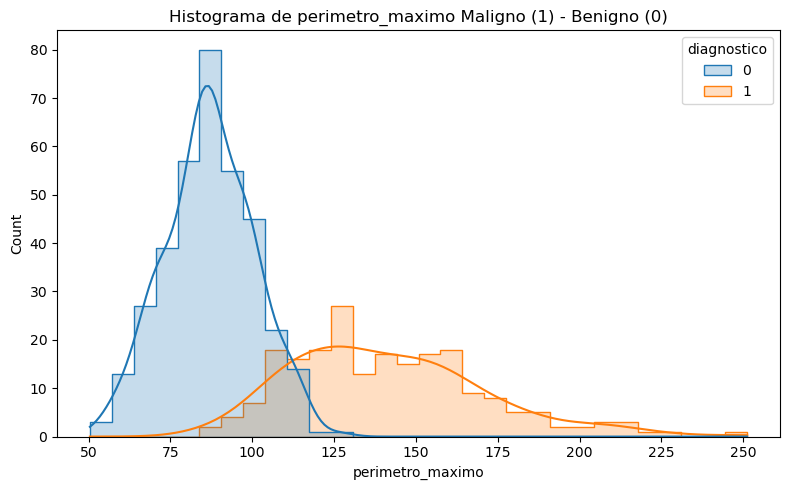

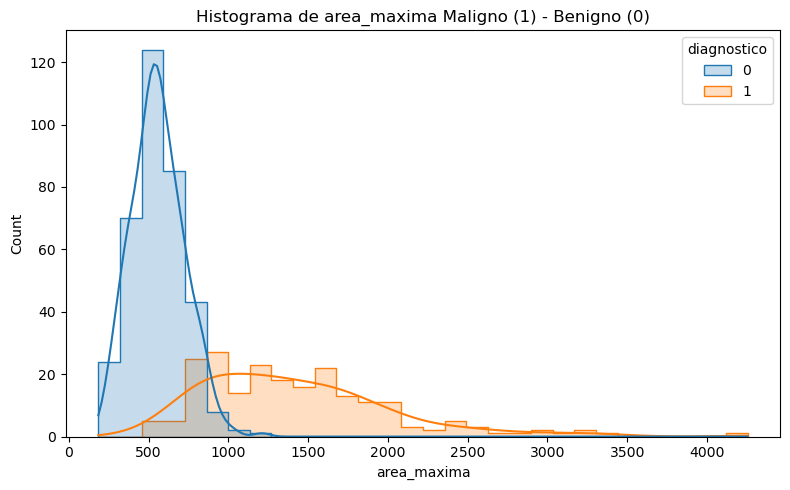

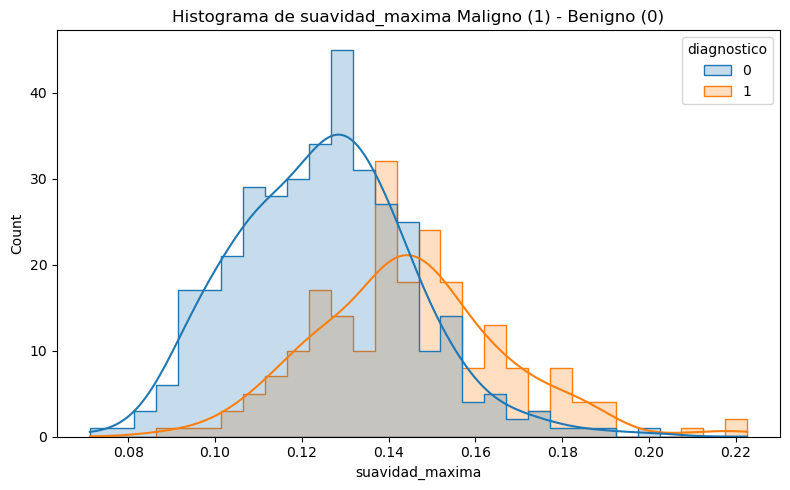

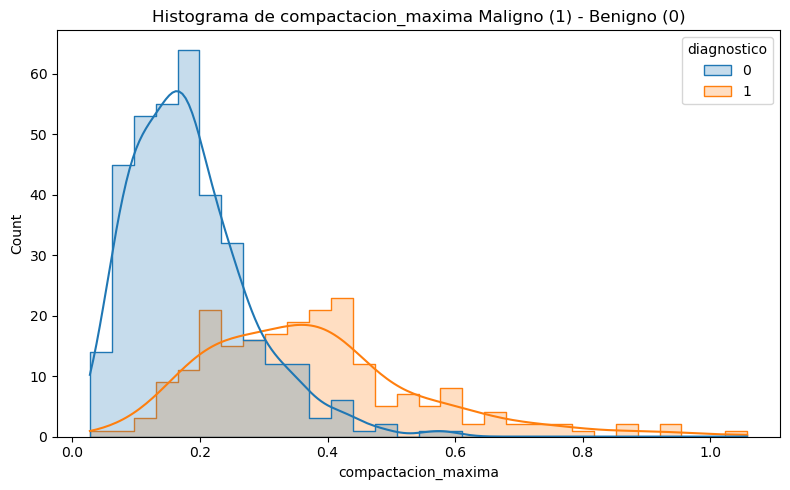

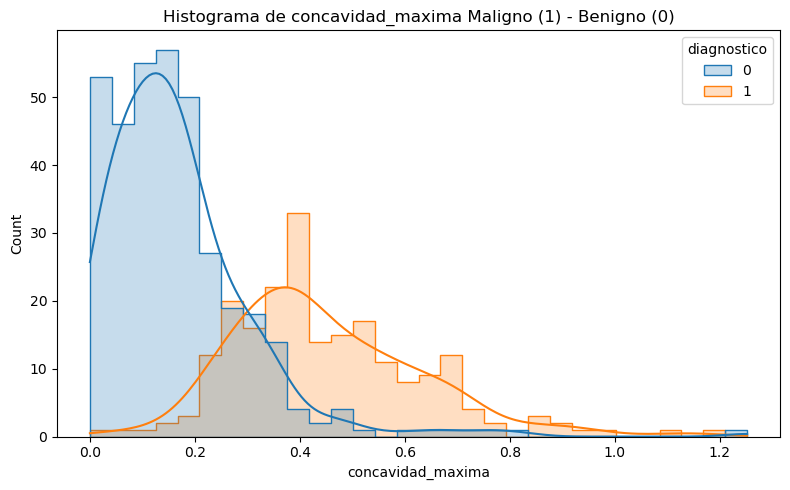

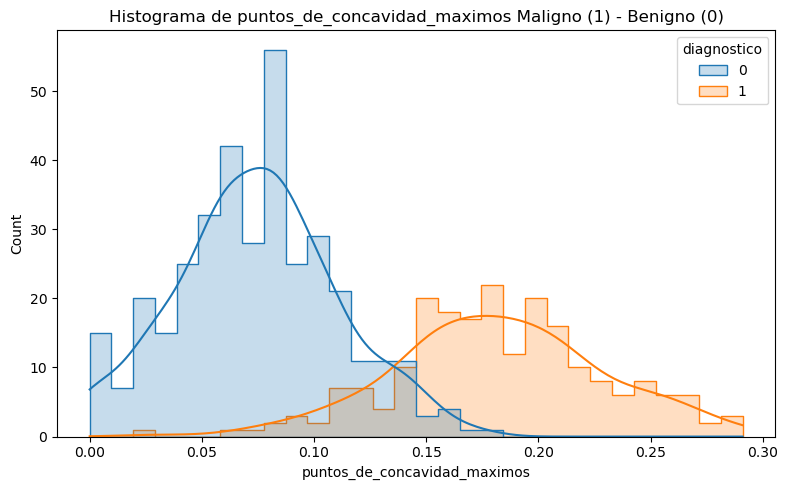

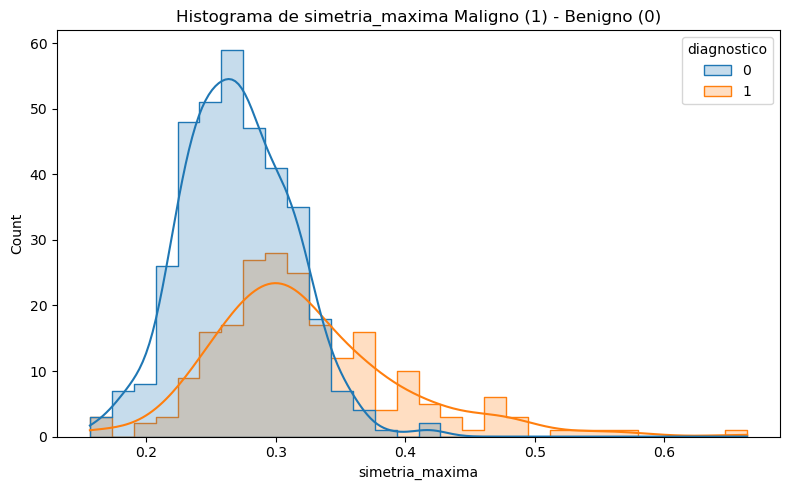

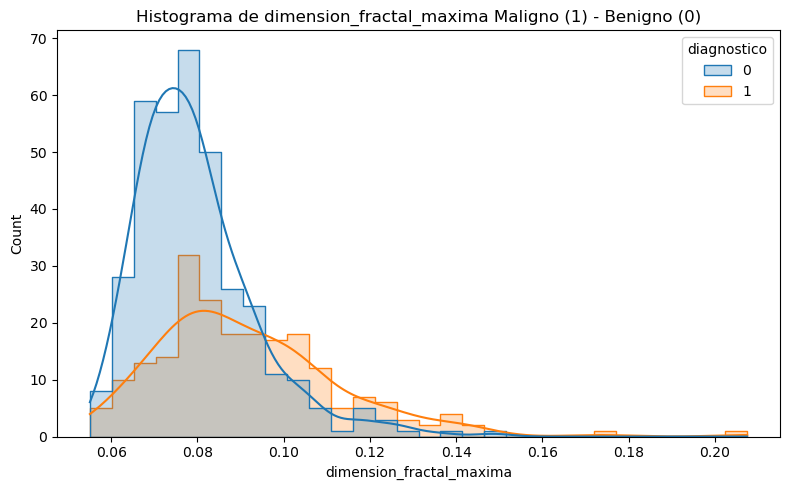

In [12]:
plot_histograms(df_raw, var_top, target="diagnostico")

# 📌 Conclusión del Análisis Exploratorio

Los boxplots y los histogramas refuerzan lo observado previamente en la matriz de correlación.

En los boxplots se evidencian diferencias claras en las medianas entre los casos Malignos (1) y Benignos (0), especialmente en las variables asociadas al tamaño y la irregularidad del tumor (radio, área, perímetro, concavidad). En la mayoría de estas variables, la mediana de los casos malignos se encuentra significativamente por encima de la correspondiente a los casos benignos, lo que confirma su fuerte relación con la variable diagnóstico.

Adicionalmente, los histogramas y distribuciones (KDE) muestran patrones diferenciados entre ambas clases. Se observa que las distribuciones de los casos malignos tienden a desplazarse hacia valores más altos, mientras que los benignos se concentran en rangos inferiores. En varias variables la superposición entre clases es limitada, lo que sugiere una buena capacidad de discriminación.

En conjunto, estos hallazgos confirman que:

Existe una diferencia estructural clara entre tumores benignos y malignos.

Las variables con mayor correlación también presentan mayor separación visual entre clases.

El dataset contiene señales discriminativas consistentes, lo que respalda el uso de modelos supervisados como una Red Neuronal para la clasificación.

# 📊 Análisis del Desbalance de Clases

| Aspecto            | Resultado       | Interpretación           | Implicación para la Red Neuronal               |
| ------------------ | --------------- | ------------------------ | ---------------------------------------------- |
| Clase 0 (Benigno)  | 350 casos       | Clase mayoritaria (~64%) | Puede dominar el aprendizaje si no se controla |
| Clase 1 (Maligno)  | 200 casos       | Clase minoritaria (~36%) | Riesgo de menor sensibilidad (recall)          |
| Proporción         | 1.75 : 1        | Desbalance moderado      | No es crítico                                  |
| Nivel de severidad | Bajo – Moderado | No es 80/20 ni extremo   | No requiere técnicas agresivas                 |



# 🎯 Estrategia Recomendada

| Estrategia    | ¿Aplicar?                         | Justificación                         |
| ------------- | --------------------------------- | ------------------------------------- |
| No hacer nada | ⚠️ Posible, pero vigilar métricas | Puede afectar recall de malignos      |
| Class Weights | ✅ Recomendado                     | Ajusta penalización sin alterar datos |
| SMOTE         | Opcional                          | Útil si el modelo muestra bajo recall |
| Undersampling | ❌ No recomendado                  | Se pierde información valiosa         |

# 🧠 Conclusión Técnica

El dataset presenta un desbalance moderado (64% vs 36%), el cual no es lo suficientemente severo como para requerir técnicas de remuestreo obligatorias.

Sin embargo, dado que el objetivo del modelo es detectar correctamente casos malignos, es recomendable utilizar ponderación de clases (class weights) para penalizar más los errores en la clase positiva y mejorar el recall sin modificar la distribución original de los datos.
